In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
# import some dataset from sklearn
iris = datasets.load_iris(as_frame=True).frame

In [3]:
iris = pd.read_csv("iris.csv")

In [4]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


<Axes: xlabel='variety', ylabel='count'>

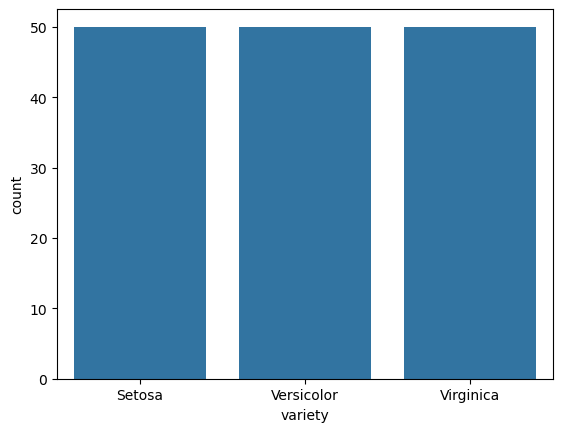

In [5]:
# Bar plot for categorical column "variety"
import seaborn as sns
counts = iris["variety"].value_counts()
sns.barplot(data = counts)

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris[iris.duplicated(keep=False)]

,sepal.length,sepal.width,petal.length,petal.width,variety
101,5.8,2.7,5.1,1.9,Virginica
142,5.8,2.7,5.1,1.9,Virginica


**Perform label encoding of target column**

In [9]:
#Encode the three flower classes as 0,1,2
labelencoder = LabelEncoder()
iris.iloc[:, -1] = labelencoder.fit_transform(iris.iloc[:, -1])
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
#check the data types after Label encoding
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Observation**
- The target column ('variety') is still object type. It needs to be converted to numeric(int)

In [12]:
#Convert the target column data type to integer
iris['variety'] = pd.to_numeric(labelencoder.fit_transform(iris['variety']))
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


In [13]:
#Divide the dataset in to x-columns and y-columns
X=iris.iloc[:,0:4]
Y=iris['variety']

In [14]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: variety, Length: 150, dtype: int32

In [15]:
#Further splitting of data into training and testing data sets
x_train, x_test, y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state = 1)
x_train

,sepal.length,sepal.width,petal.length,petal.width
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


In [16]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = None)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

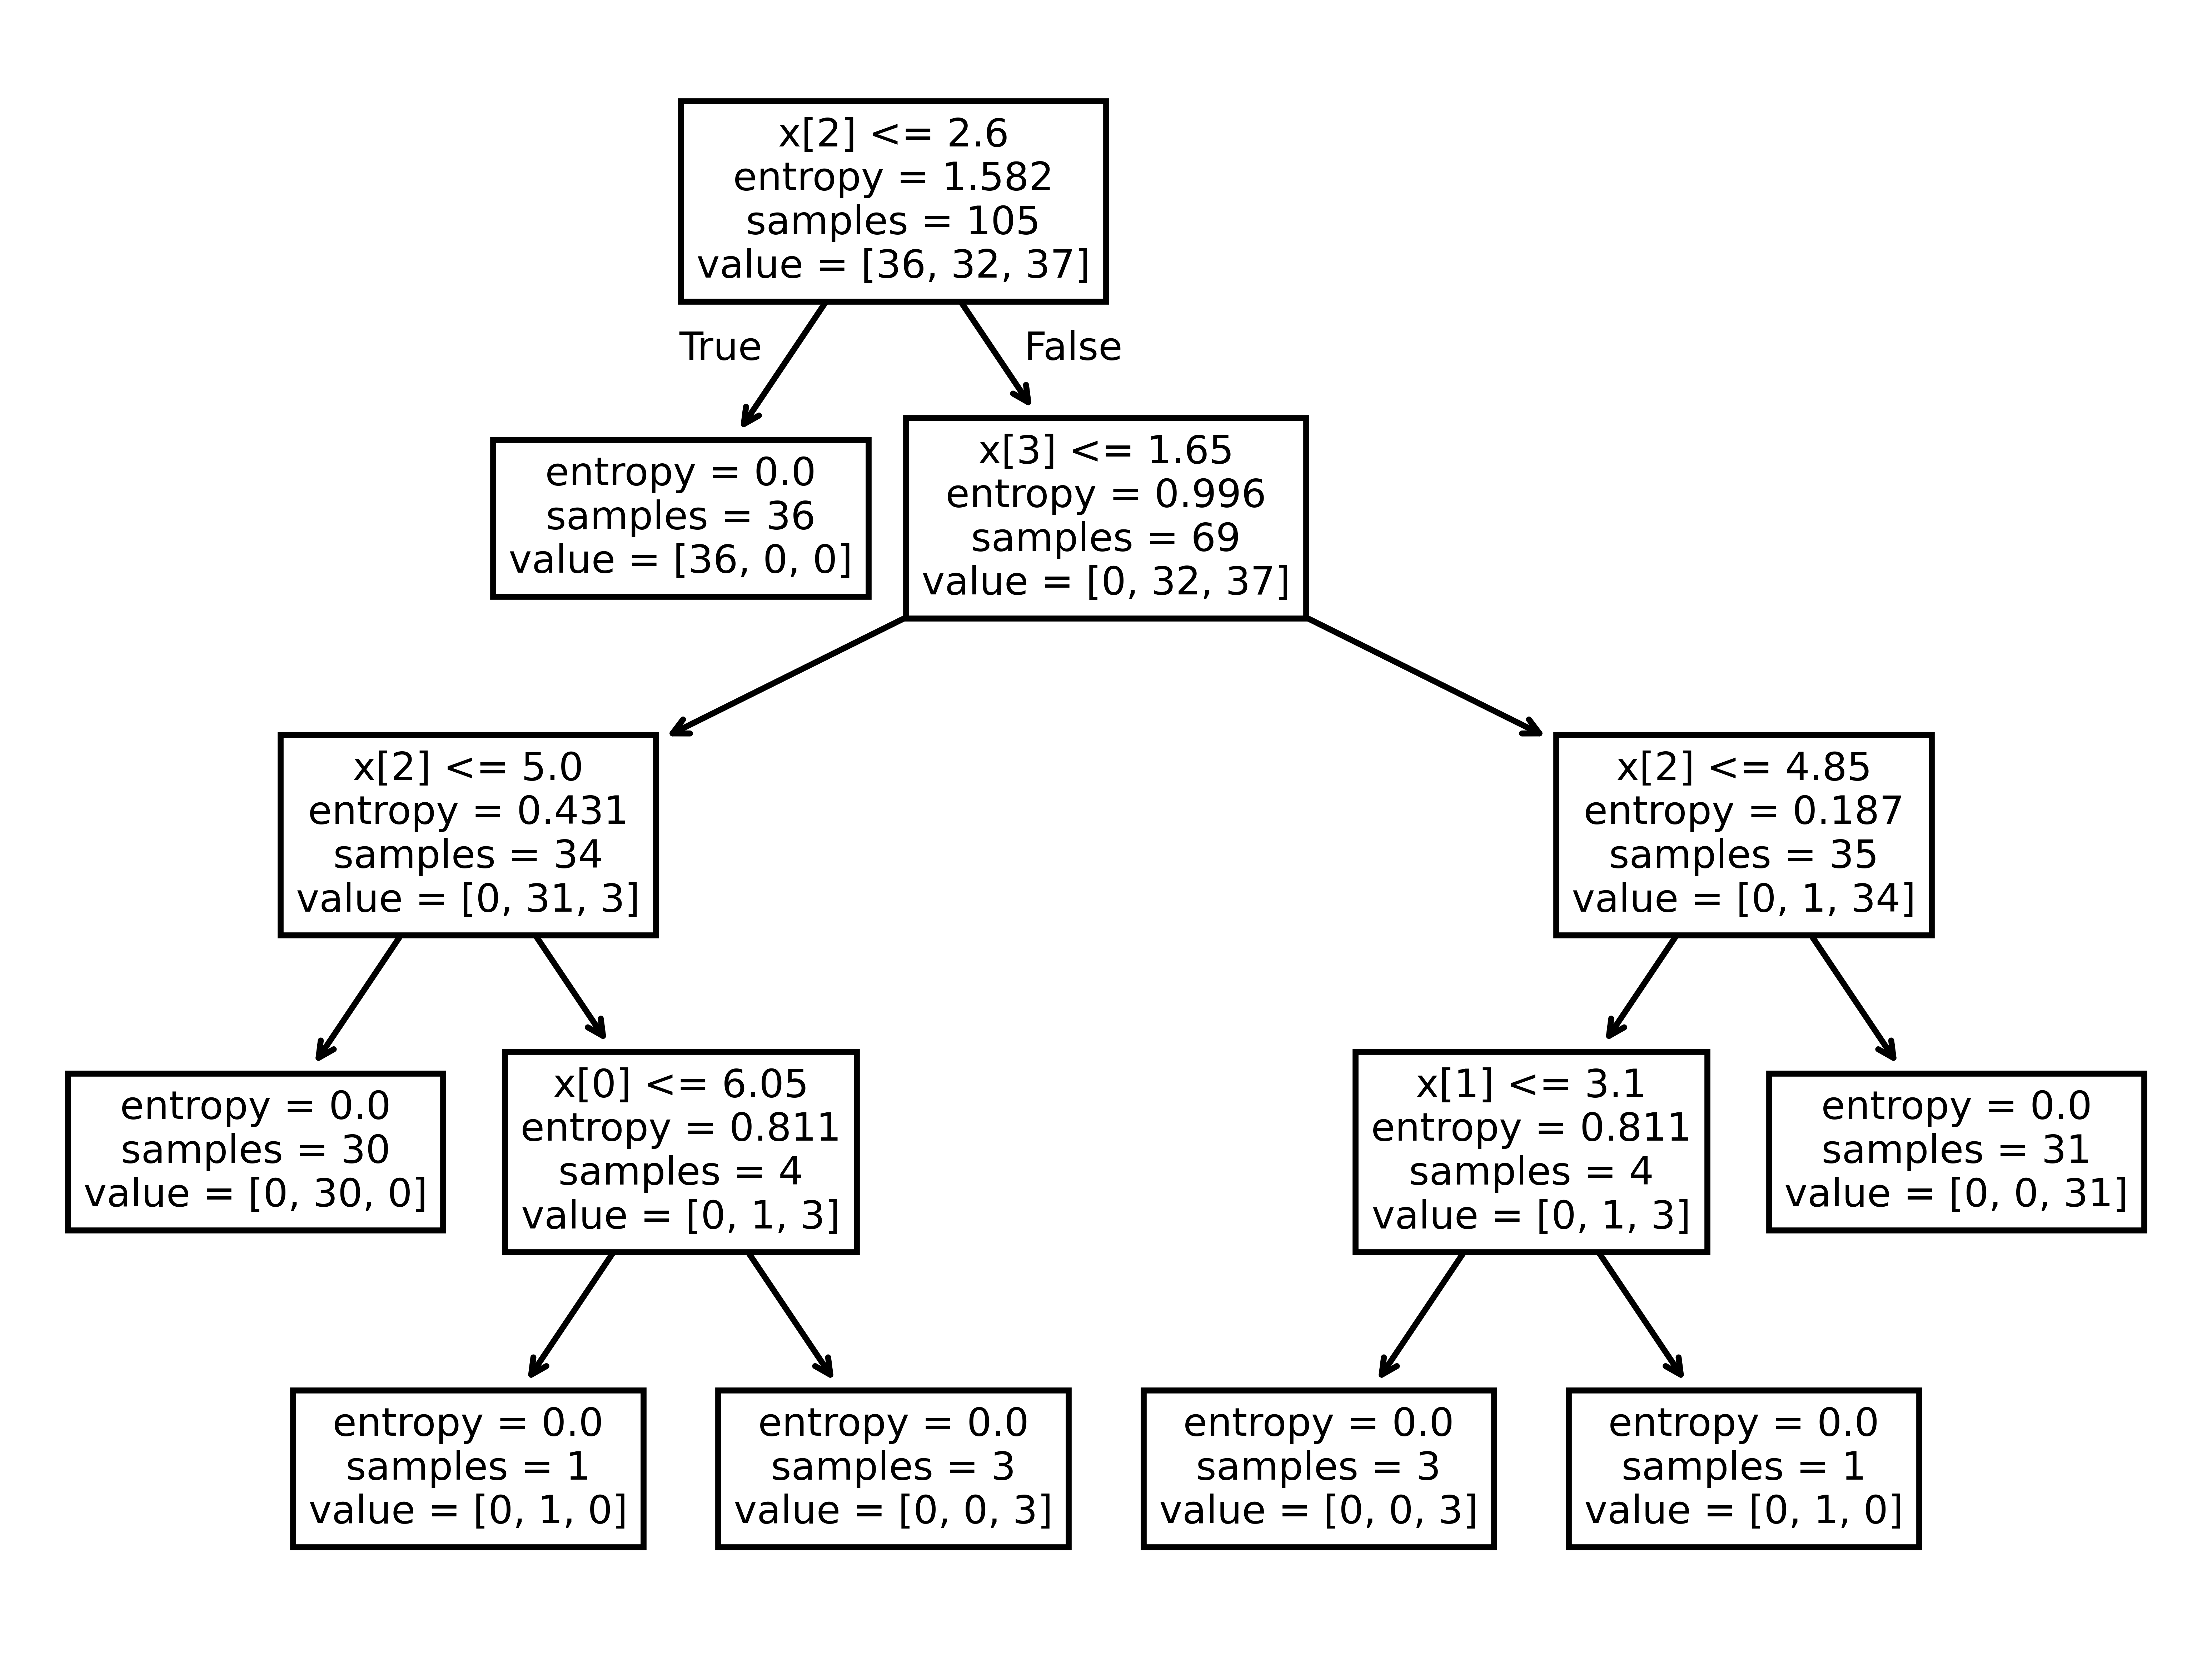

In [17]:
#Plot the decision tree
plt.figure(dpi=1200)
tree.plot_tree(model);

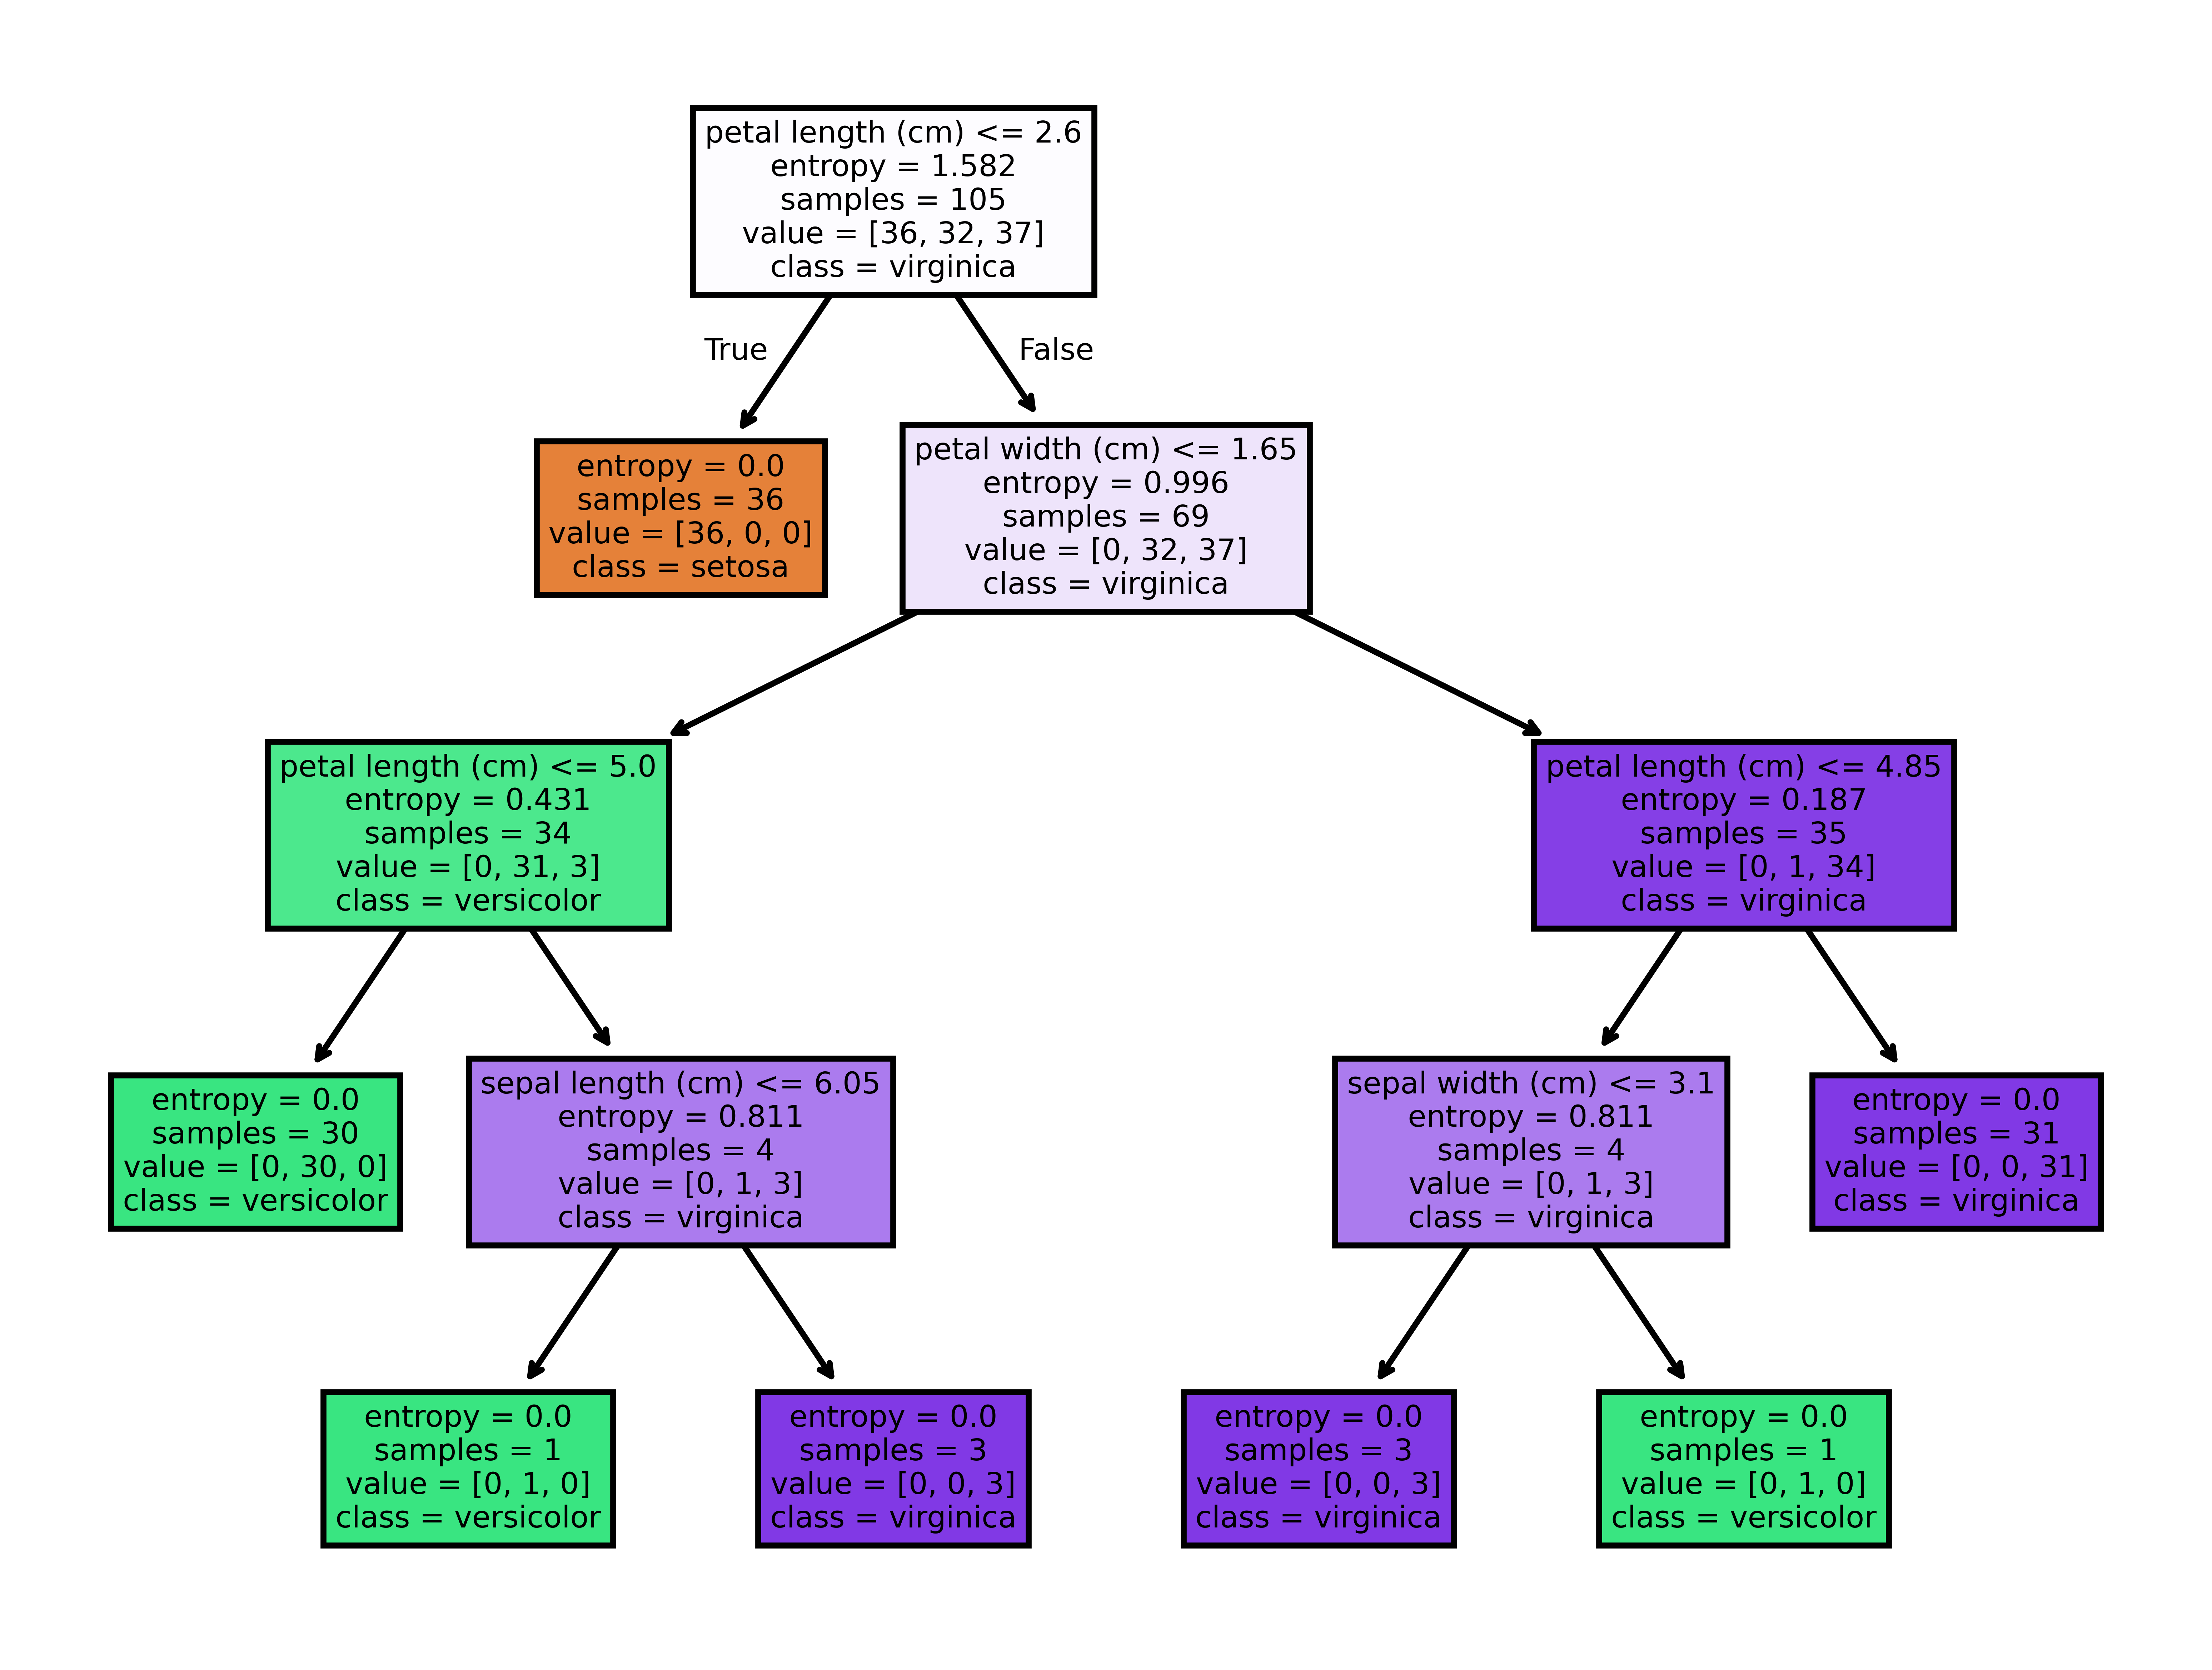

In [37]:
fn = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']
plt.figure(dpi=1200)
tree.plot_tree(model, feature_names = fn, class_names=cn, filled = True);

In [41]:
#Predicting on test data
preds = model.predict(x_test) #predicting on test data set
preds

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [43]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

